In [65]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.model_selection import train_test_split

#Importing the dataset
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [66]:
dataset_train.rename(columns={'default payment next month':'default'}, inplace=True)

In [67]:
dataset_train.drop(['ID'], axis=1, inplace=True)

In [68]:
dataset_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,26,-1,-1,-1,0,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,100000,1,2,1,47,0,0,2,0,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0
2,30000,2,2,2,23,3,3,3,3,2,...,29176,29958,30520,1200,1200,0,1400,1200,0,1
3,280000,2,1,2,31,2,-1,-1,-2,-2,...,0,0,0,168,0,0,0,0,0,0
4,210000,1,2,1,54,2,-1,-1,-1,-1,...,485,210,3483,176,195,485,0,4466,417,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,50000,1,2,2,32,0,0,0,0,0,...,55957,29238,6119,2000,3000,1591,72,1134,73421,0
26996,200000,1,1,2,37,2,2,2,2,2,...,164182,169029,172084,13500,6000,0,7500,6000,4000,1
26997,50000,1,1,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
26998,70000,2,2,2,25,0,0,0,0,2,...,35122,28633,28039,3000,2000,4500,1200,0,1200,1


In [69]:
y = dataset_train['default']
features = dataset_train.drop(['default'], axis=1, inplace=False)

In [70]:
dataset_train['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 0, 6])

In [71]:
dataset_train['EDUCATION']=np.where(dataset_train['EDUCATION'] == 5, 4, dataset_train['EDUCATION'])
dataset_train['EDUCATION']=np.where(dataset_train['EDUCATION'] == 6, 4, dataset_train['EDUCATION'])
dataset_train['EDUCATION']=np.where(dataset_train['EDUCATION'] == 0, 4, dataset_train['EDUCATION'])

In [72]:
dataset_train['MARRIAGE'].unique()

array([2, 1, 0, 3])

In [73]:
dataset_train['MARRIAGE']=np.where(dataset_train['MARRIAGE'] == 0, 3, dataset_train['MARRIAGE'])
dataset_train.MARRIAGE.unique()

array([2, 1, 3])

In [74]:
( dataset_train['default'].value_counts() / len(dataset_train) ) * 100

0    77.862963
1    22.137037
Name: default, dtype: float64

In [75]:
features

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,100000,2,2,2,26,-1,-1,-1,0,0,...,4159,3542,1980,3980,4210,4159,1000,1080,2000,1525
1,100000,1,2,1,47,0,0,2,0,0,...,69111,64287,67838,66135,7000,0,2500,5500,0,3000
2,30000,2,2,2,23,3,3,3,3,2,...,29954,29176,29958,30520,1200,1200,0,1400,1200,0
3,280000,2,1,2,31,2,-1,-1,-2,-2,...,0,0,0,0,168,0,0,0,0,0
4,210000,1,2,1,54,2,-1,-1,-1,-1,...,195,485,210,3483,176,195,485,0,4466,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,50000,1,2,2,32,0,0,0,0,0,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
26996,200000,1,1,2,37,2,2,2,2,2,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
26997,50000,1,1,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
26998,70000,2,2,2,25,0,0,0,0,2,...,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [76]:
stdX = (features - features.mean()) / (features.std())              # standardization

X = dataset_train.drop(['default'], axis=1, inplace=False)
y = dataset_train['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX, y, test_size=0.2, random_state=42)

In [106]:
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.ensemble import RandomForestClassifier
param_dist = {'n_estimators': [50,100,150,200,250,300],
               "max_features": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               "criterion": ["gini", "entropy","mse", "mae"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist,
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

/home/karun/PycharmProjects/NPCI_Credit_Card/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/karun/PycharmProjects/NPCI_Credit_Card/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karun/PycharmProjects/NPCI_Credit_Card/venv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/home/karun/PycharmProjects/NPCI_Credit_Card/venv/lib/python3.10/site-pack

Tuned Random Forest Parameters: {'n_estimators': 200, 'max_features': 18, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.8257407407407408

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4229
           1       0.69      0.35      0.47      1171

    accuracy                           0.83      5400
   macro avg       0.77      0.65      0.68      5400
weighted avg       0.81      0.83      0.80      5400


Average 5-Fold CV Score: 0.8207 , Standard deviation: 0.0052


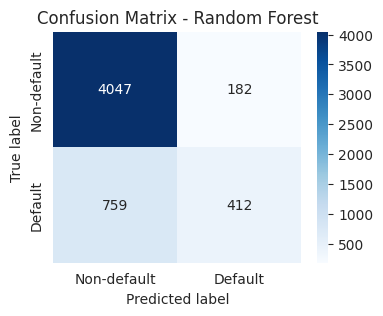

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6,
                                     max_features= 18, n_estimators= 200,
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d",
            xticklabels = ['Non-default', 'Default'],
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

In [109]:
#Use model on test.csv and save as submission.csv with 2 columns: ID and default.payment.next.month
dataset_final_test = pd.read_csv('test.csv')
#Rename column
dataset_final_test.rename(columns={'ID   ':'ID'}, inplace=True)
#Predict output and store in a new column
dataset_final_test['default'] = Ran.predict(dataset_final_test.drop(['ID'], axis=1, inplace=False))
#Save as submission.csv
dataset_final_test[['ID','default']].to_csv('submission_out.csv', index=False)